# Introduction

This script focuses on predicting the rainfall on the basis of various attributes. We will create a few models to find the best one for this purpose. In this script, we will use the Kaggle dataset's and our Prediction Target will be 'rainfall'.

# Importing Libraries

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# checking if all the libraries imported successfully or not
print("Imported Successfully!")

Imported Successfully!


# Loading Datasets

In [2]:
# Loading the training data
train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")

# Loading the testing data
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")

# checking if datasets have been loaded successfully
print("Datasets Loaded Successfully!")

Datasets Loaded Successfully!


# Data Exploration

## Skimming The Datasets

In [3]:
# printing shapes of datasets
print(train.shape)
print(test.shape)

(2190, 13)
(730, 12)


There are:

13 columns and 2190 rows in the Train Dataset; and

12 columns and 730 rows in the Test Dataset.

In [4]:
# going through data's top rows
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
# going through data's last rows
train.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [6]:
# going through data's top rows
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [7]:
# going through data's last rows
test.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5
729,2919,365,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6


## Examining Dataset Structure

In [8]:
# describing dataset's basic information, i.e., info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


The dataset by default have 0 null values, and correct datatypes assigned to each column.

In [9]:
# checking numeric columns' statistics
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [10]:
# examining unique values of dataset
train.nunique()

id               2190
day               365
pressure          236
maxtemp           219
temparature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64

In [11]:
# examining types of columns

# categorical columns
cat_col = train.select_dtypes(include='object').columns
print('Categorical columns :',cat_col)

# numerical columns
num_col = train.select_dtypes(exclude='object').columns
print('\nNumerical columns :',num_col)

Categorical columns : Index([], dtype='object')

Numerical columns : Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')


There are no categorical columns in the dataset. We only have numerical columns in it.

## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


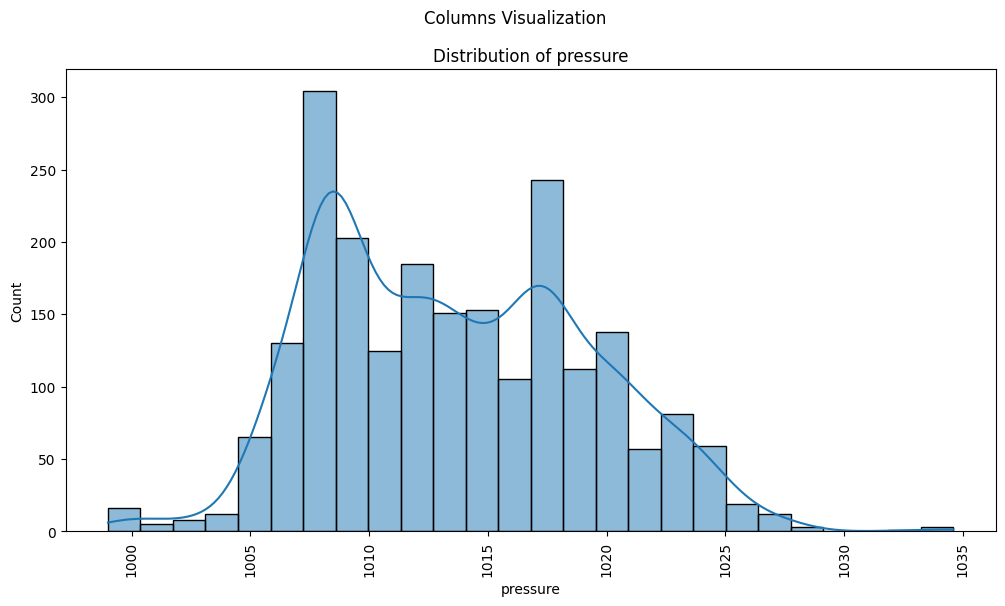

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


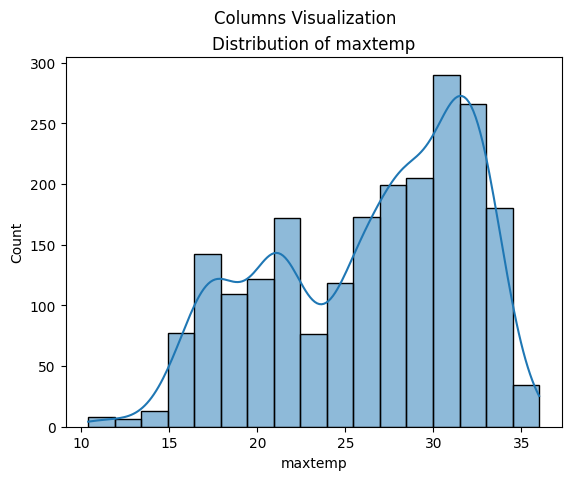

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


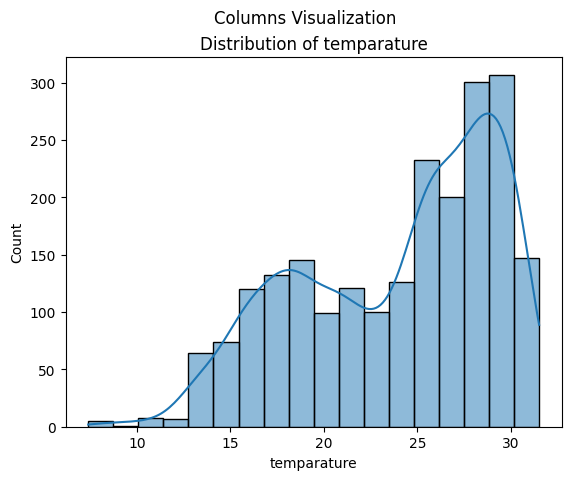

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


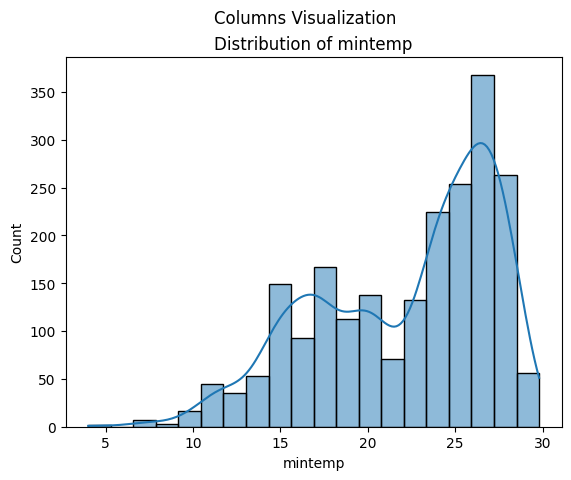

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


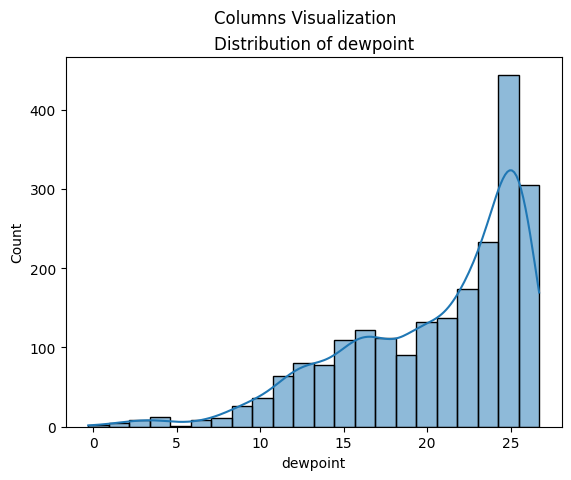

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


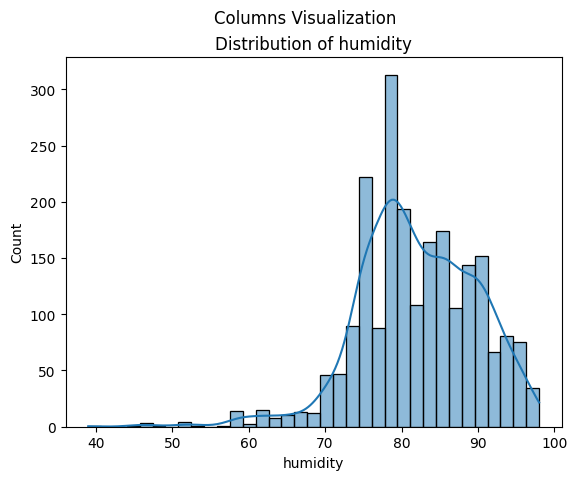

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


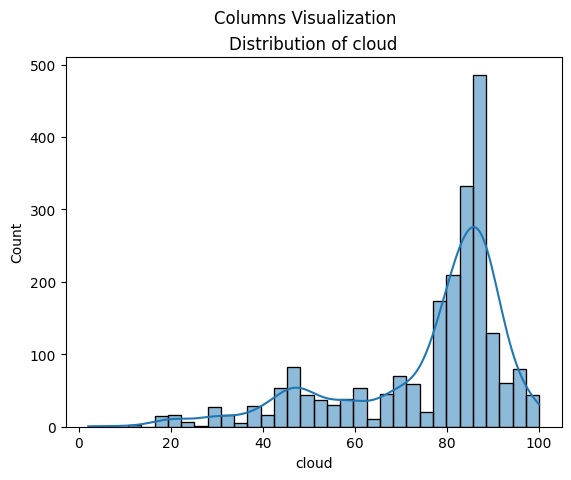

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


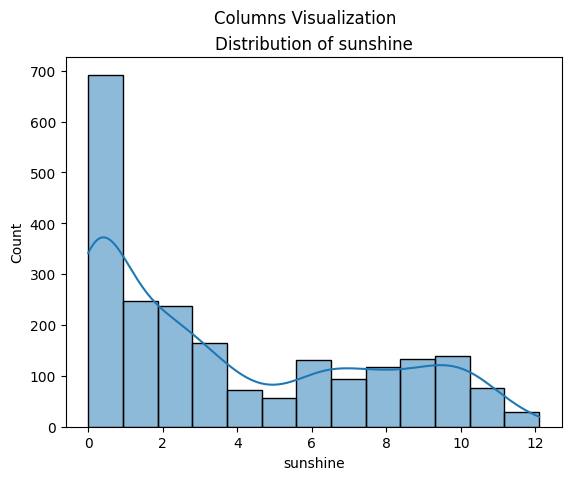

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


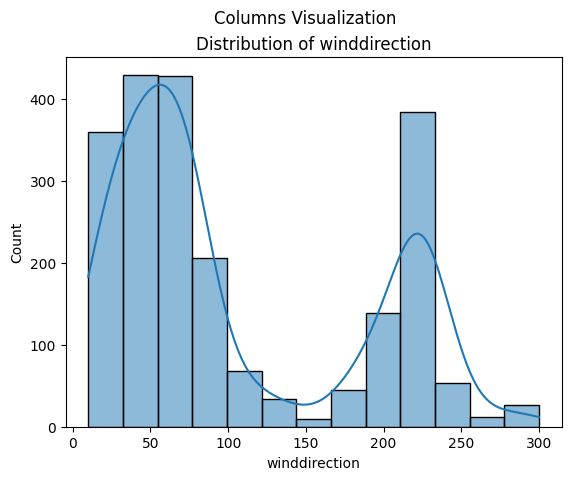

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


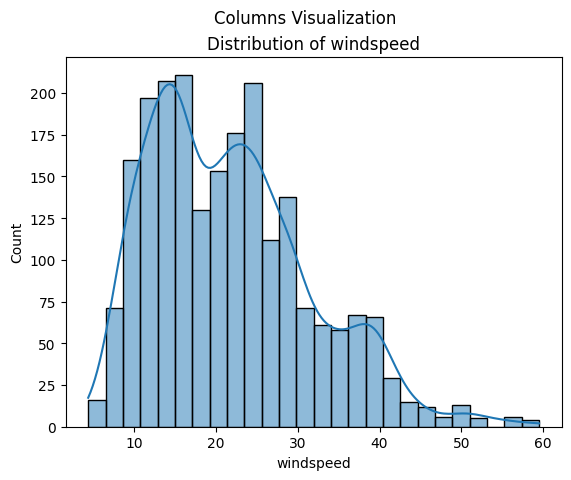

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


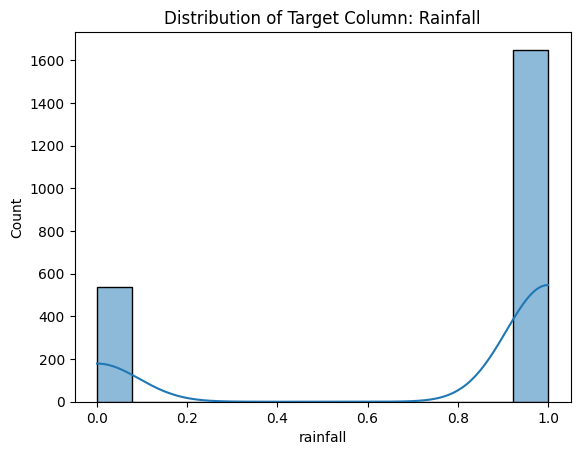

In [12]:
# setting parameters for graphs
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

# creating graphs

col_graph = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

for col in col_graph:
    sns.histplot(train[col], kde=True)
    plt.suptitle('Columns Visualization')
    plt.title(f"Distribution of {col}")
    plt.show()

# creating graphs for target column
sns.histplot(train['rainfall'], kde=True)
plt.title("Distribution of Target Column: Rainfall")
plt.show()

# Data Preprocessing

## Renaming Wrong Column Name

In [13]:
train.rename(columns={'temparature': 'temperature'}, inplace=True)
test.rename(columns={'temparature': 'temperature'}, inplace=True)
col_graph[2]='temperature'

## Dropping ID and RAINFALL Columns

In [14]:
# dropping id, day and rainfall columns in both datasets and saving them individually
id_col, day_col, rainfall_col = test['id'], test['day'], train['rainfall']

train.drop(['id', 'day', 'rainfall'], axis=1, inplace=True)
test.drop(['id', 'day'], axis=1, inplace=True)

# checking if columns dropped successfully or not
print('Columns dropped and saved separately!')

Columns dropped and saved separately!


## Examining Outliers

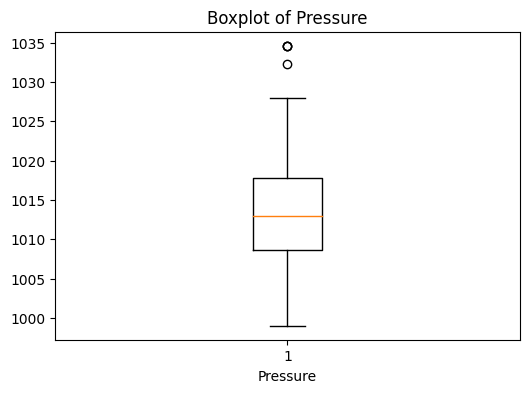

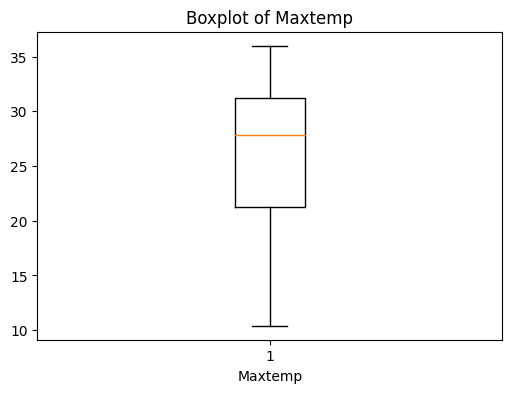

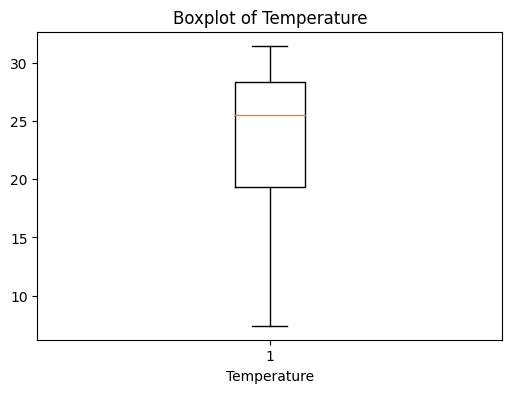

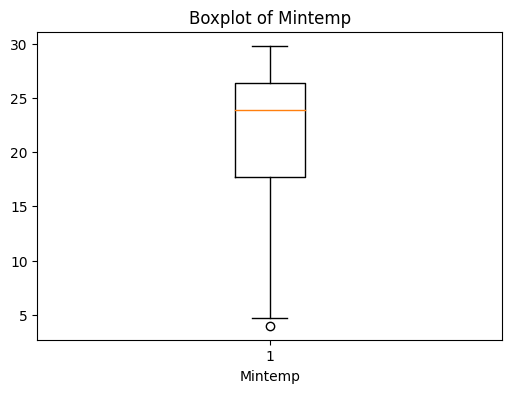

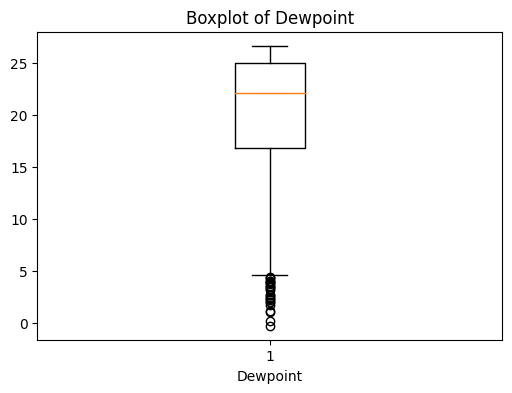

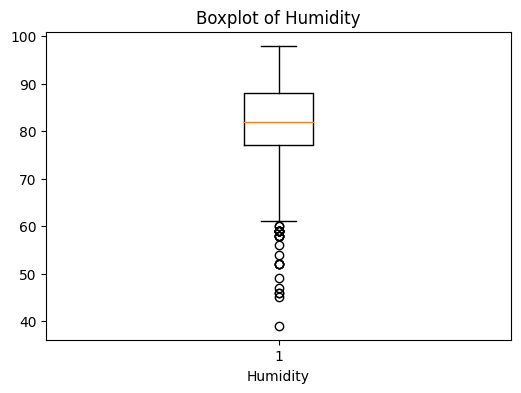

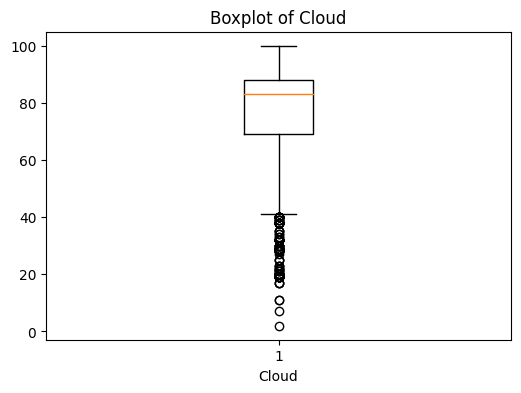

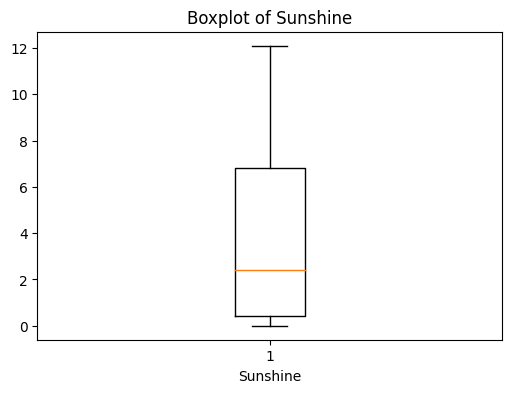

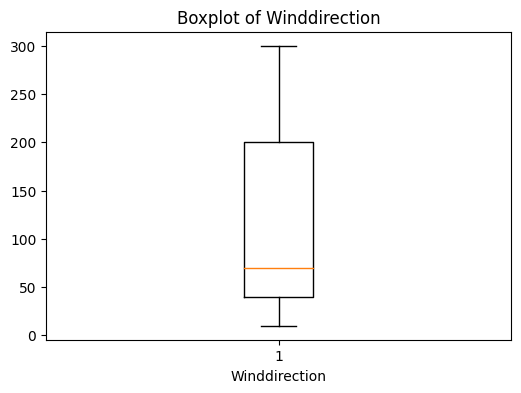

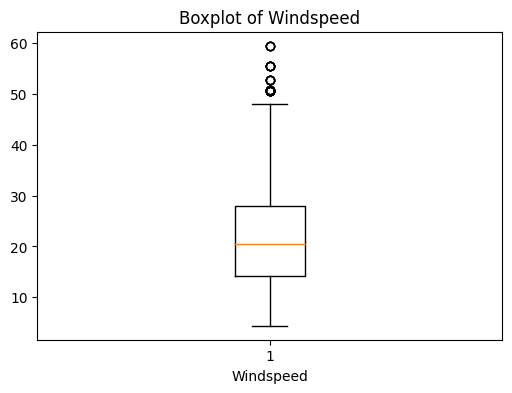

In [15]:
# creating function to create boxplots
def plot_boxplots(data, columns):
    for col in columns:
        plt.figure(figsize=(6, 4))
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.show()

# using the function to create boxplots to find outliers
plot_boxplots(train, col_graph)

## Dropping Outliers

In [16]:
# creating function that drops outliers
def outliers(train, col):
    q1 = train[col].quantile(0.03)
    q3 = train[col].quantile(0.97)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])
    train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])
        
# updating num_col variable, as id, day and rainfall columns were dropped
num_col = train.select_dtypes(exclude='object').columns
print('Columns :',num_col)

Columns : Index(['pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')


In [17]:
# using the function to drop outliers
for col in num_col:
    outliers(train, col)
    outliers(test, col)
    
# checking if outliers dropped successfully or not
print('Outliers Dropped Successfully!')

Outliers Dropped Successfully!


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


## Handling Missing Values

In [18]:
# checking for possible null values in train dataset
train.isnull().sum()

pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

There are no null values in the train dataset, so we don't have to take any actions for them.

In [19]:
# checking for possible null values in test dataset
test.isnull().sum()

pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

We have one value missing in the test dataset's column 'wind direction'. We have to use imputation to fill this cell. We will use Simple Imputer to fill in the cell.

## Mode Imputation

In [20]:
# using SIMPLE IMPUTER to deal with missing values in test dataset
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(test)
test_imputed = imputer.transform(test)
test_imputed_df = pd.DataFrame(test_imputed, columns=test.columns)

## Examining Duplicates

In [21]:
# checking for total of duplicated rows in train dataset
print(train.duplicated().sum())

0


In [22]:
# checking for total of duplicated rows in test dataset
print(test.duplicated().sum())

0


There are no duplicates in both the dataset's.

# Model Building For Prediction

## Feature Selection

In [23]:
# getting column names of train dataset to do feature selection easily
train.columns

Index(['pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [24]:
# separating data into features and target vairable

# features
X = train.columns

# target variable
Y = rainfall_col

## Splitting Dataset

In [25]:
# splitting dataset into 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(train[X], Y, test_size = 0.2, random_state = 42)

## Training A Few Models

### Random Forest Regressor

In [26]:
# initialising model
rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 3)

# training model
rfr.fit(X_train, Y_train)

# predicting values using model
rfr_predictions = rfr.predict(X_test)

# saving predictions as whole numbers in a array
rfr_predictions = rfr_predictions.round().astype(int)

### XGBRegressor

In [27]:
# initialising model
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, max_depth = 3)

# training model
xgb.fit(X_train, Y_train)

# predicting values using model
xgb_predictions = xgb.predict(X_test)

# saving predictions as whole numbers in a array
xgb_predictions = xgb_predictions.round().astype(int)

### Linear Regression

In [28]:
# initialising model
lr = LinearRegression()

# training model
lr.fit(X_train, Y_train)

# predicting values using model
lr_predictions = lr.predict(X_test)

# saving predictions as whole numbers in a array
lr_predictions = lr_predictions.round().astype(int)

## Model's Evaluation

In [29]:
# printing evaluations of model

print("ROC AUC Scores:")

rfr_auc_score = roc_auc_score(Y_test, rfr_predictions)
print(f"Random Forest Regressor: {rfr_auc_score:.2f}")

xgb_auc_score = roc_auc_score(Y_test, xgb_predictions)
print(f"XGBRegressor: {xgb_auc_score:.2f}")

lr_auc_score = roc_auc_score(Y_test, lr_predictions)
print(f"Linear Regression: {lr_auc_score:.2f}")

print()

print("Classification Reports:")

print("Random Forest Regressor:")
print(classification_report(Y_test, rfr_predictions))

print("XGBRegressor:")
print(classification_report(Y_test, xgb_predictions))

print("Linear Regression:")
print(classification_report(Y_test, lr_predictions))

ROC AUC Scores:
Random Forest Regressor: 0.79
XGBRegressor: 0.77
Linear Regression: 0.76

Classification Reports:
Random Forest Regressor:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       119
           1       0.88      0.93      0.90       319

    accuracy                           0.86       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.85      0.86      0.85       438

XGBRegressor:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       119
           1       0.86      0.93      0.90       319

    accuracy                           0.84       438
   macro avg       0.82      0.77      0.79       438
weighted avg       0.84      0.84      0.84       438

Linear Regression:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       119
           1       0.86      0.94      0.90       319

    accura

# Testing Model With Test Dataset & Saving Result

We will select the best model, that is, model having highest ROC AUC Score and highest Accuracy. In our case, this model is '**Random Forest Regressor**' .

In [30]:
# making predictions
predictions_test = rfr.predict(test_imputed_df[X])

# creating a DataFrame to store the predictions along with IDs
result = pd.DataFrame({'id': id_col, 'rainfall': predictions_test})
print(result)

# saving the results to a CSV file
result.to_csv('predictions_for_test_data.csv', index=False)

       id  rainfall
0    2190  0.958649
1    2191  0.958649
2    2192  0.862380
3    2193  0.193722
4    2194  0.194727
..    ...       ...
725  2915  0.958649
726  2916  0.906894
727  2917  0.955849
728  2918  0.959383
729  2919  0.954084

[730 rows x 2 columns]


# Conclusion

- We used various algorithm's to choose the best one to predict rainfall based on various attributes.
- We chose Random Forest Regressor lastly for predictions.
- Our model's evaluation metric's were ROC AUC Score and Classification Report.
- Since we have our model ready now, we can now do accurate predictions for rainfall.